# <center> <h1> 📝  🅰️ 👨‍💻  🅱️ 📝  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

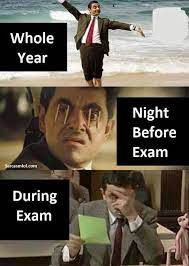

### 1 - step. We will read the unmarked test sheet 📄

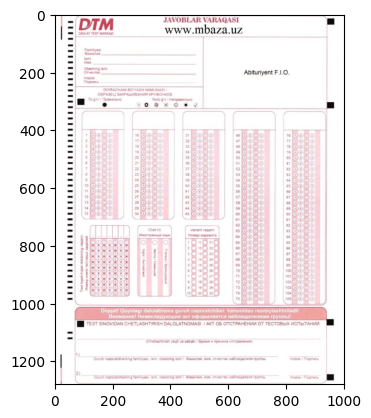

In [2]:
img_empty=cv2.imread("Photo/empty.jpg")
img_empty=cv2.cvtColor(img_empty,cv2.COLOR_BGR2RGB)
plt.imshow(img_empty)

### 2 - step. We will read the marked test sheet

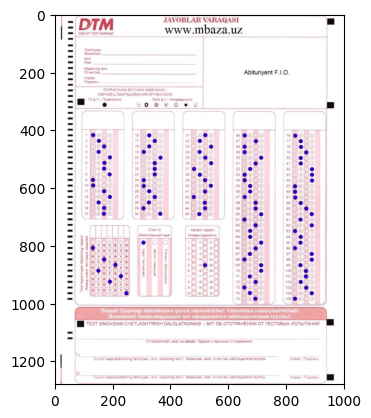

In [3]:
img_marked=cv2.imread("Photo/marked.jpg.")
img_marked=cv2.cvtColor(img_marked,cv2.COLOR_BGR2RGB)
plt.imshow(img_marked)

### 3 - step. We cut block 1 from the unmarked test

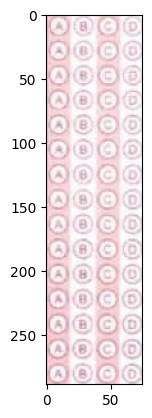

In [4]:
blok1_empty=img_empty[410:699,122:197]
plt.imshow(blok1_empty)

### 4 - step. We cut block 1 from the marked test  📝

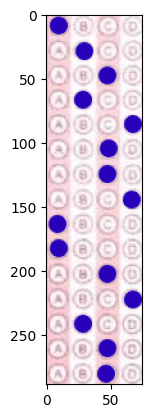

In [5]:
blok1_marked=img_marked[410:699,122:197]
plt.imshow(blok1_marked)

### 5 - step. Create mask 🥷

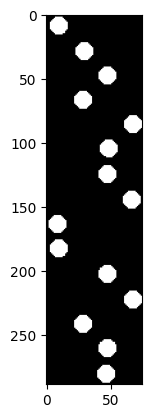

In [6]:
range1=np.array([32,0,150])
range2=np.array([146,117,255])

maska = cv2.inRange(blok1_marked,range1,range2)

plt.imshow(maska,cmap='gray')

### 6 -step. By placing the mask on an unmarked image, we can see the marked options on it

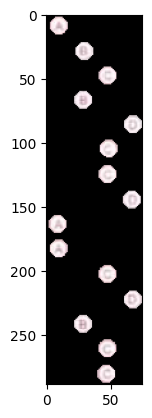

In [7]:
blok1_empty[maska!=255]=0
plt.imshow(blok1_empty)

In [8]:
blok1_empty.shape

(289, 75, 3)

### 7 - step. Divide the picture into 15 parts along the y axis

In [9]:
blok1_variant = []

for i in range(0,289,19):
    blok1_variant.append(blok1_empty[i:i+19])
    

In [10]:
len(blok1_variant)

16

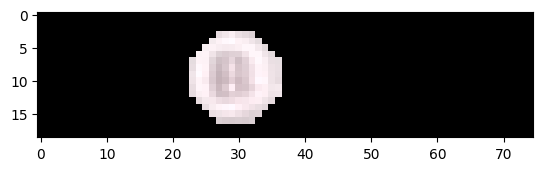

In [11]:
plt.imshow(blok1_variant[1])

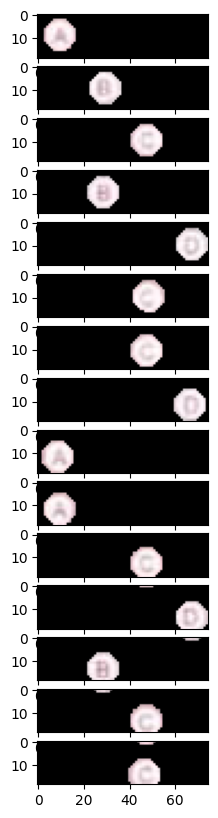

In [12]:
# Show 15 parts
plt.figure(figsize=(15,10))

for i in range(1,len(blok1_variant)):
    plt.subplot(15,1,i)
    plt.imshow(blok1_variant[i-1])

### 8 - step. We divide each part of the part divided into 15 parts along the y axis into 4 parts along the x axis 

In [13]:
blok1_variants = []

for i in range(15):
    for j in range(0,75,19):
        blok1_variants.append(blok1_variant[i][:,j:j+19])

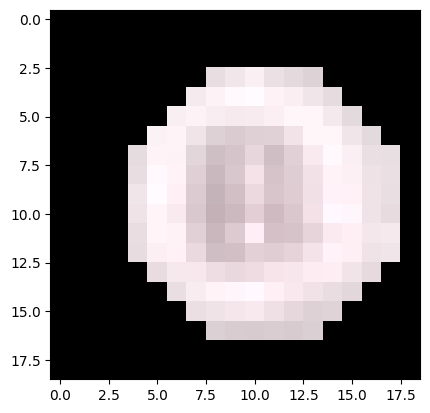

In [14]:
plt.imshow(blok1_variants[5])

#### we divided into 60 pieces

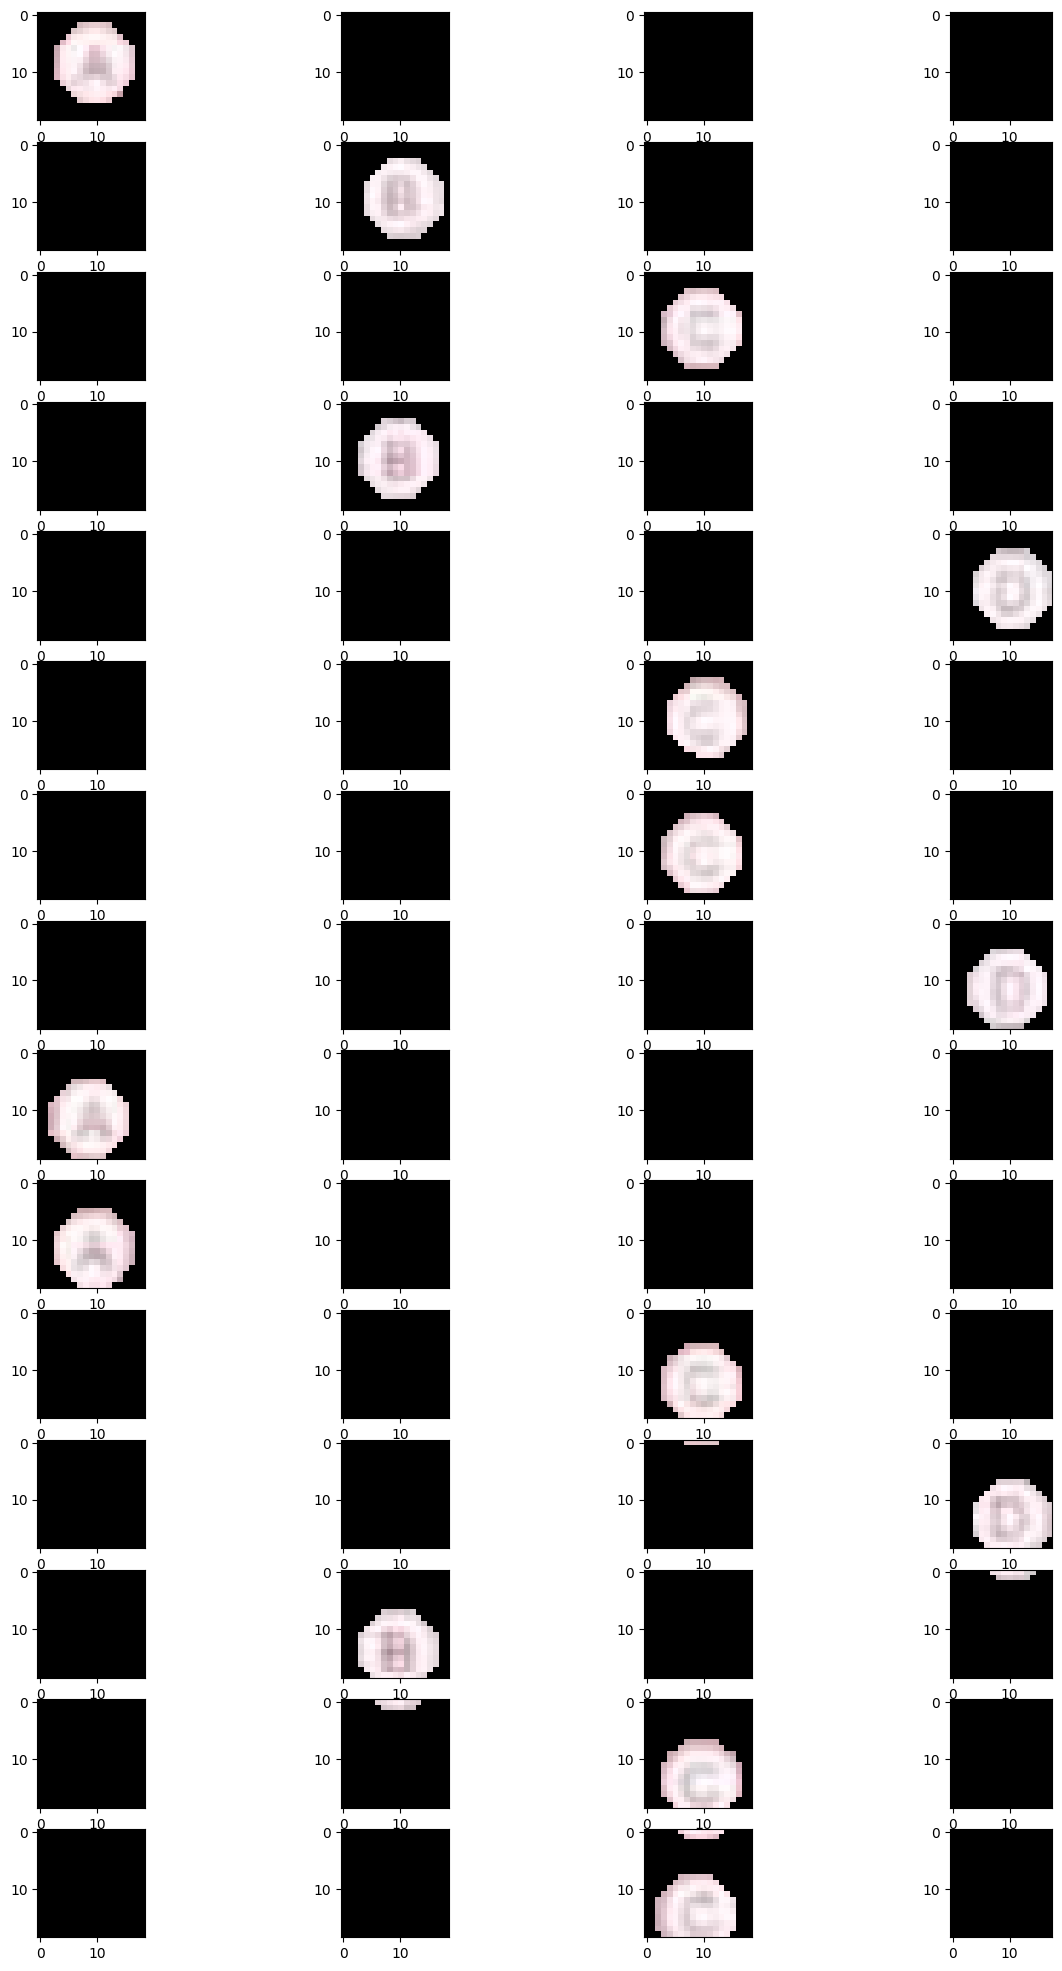

In [15]:
fig, axes = plt.subplots(15,4, figsize=(15,25))
k=0
for i in range(15):
    for j in range(4):
        axes[i][j].imshow(blok1_variants[k],cmap='gray')
        
        k+=1
        
plt.show()

In [16]:
len(blok1_variants)

60

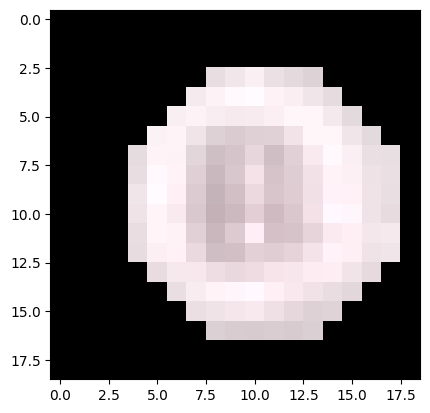

In [17]:
plt.imshow(blok1_variants[5])

### 9 - step. We convert images from rgb to gray format

In [18]:
def togray(images):
    
    images2=[]
    
    for i in images:
        images2.append(cv2.cvtColor(i,cv2.COLOR_RGB2GRAY))
    return images2

In [19]:
blok1_variants_gray = togray(blok1_variants)

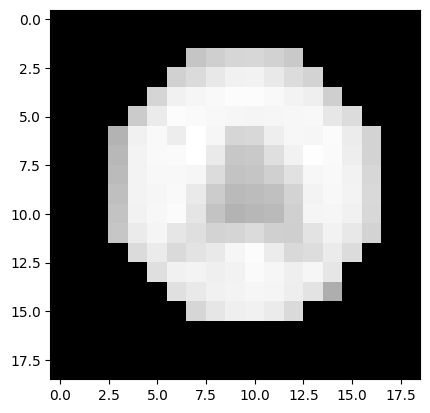

In [20]:
plt.imshow(blok1_variants_gray[0],cmap='gray')

In [21]:
blok1_variants_gray[0].shape

(19, 19)

### 10 - step. We calculate the sum of each block

In [22]:
summa=[]
for i in blok1_variants_gray:
    summa.append(np.sum(i))

In [23]:
summa

[35543,
 0,
 0,
 0,
 0,
 35514,
 0,
 0,
 0,
 0,
 35732,
 0,
 0,
 35127,
 0,
 0,
 0,
 0,
 0,
 35772,
 0,
 0,
 35695,
 0,
 0,
 0,
 36074,
 0,
 0,
 0,
 0,
 35661,
 35294,
 0,
 0,
 0,
 35395,
 0,
 0,
 0,
 0,
 0,
 34435,
 0,
 0,
 0,
 1248,
 32163,
 0,
 31588,
 0,
 3058,
 0,
 3070,
 32304,
 0,
 0,
 0,
 33076,
 0]

In [24]:
summa=np.array(summa)
summa

array([35543,     0,     0,     0,     0, 35514,     0,     0,     0,
           0, 35732,     0,     0, 35127,     0,     0,     0,     0,
           0, 35772,     0,     0, 35695,     0,     0,     0, 36074,
           0,     0,     0,     0, 35661, 35294,     0,     0,     0,
       35395,     0,     0,     0,     0,     0, 34435,     0,     0,
           0,  1248, 32163,     0, 31588,     0,  3058,     0,  3070,
       32304,     0,     0,     0, 33076,     0], dtype=uint32)

In [25]:
summa.shape

(60,)

### 11 - step. We resize our array (15,4) where the sum is calculated

In [26]:
summa = np.reshape(summa, (15,4))
summa

array([[35543,     0,     0,     0],
       [    0, 35514,     0,     0],
       [    0,     0, 35732,     0],
       [    0, 35127,     0,     0],
       [    0,     0,     0, 35772],
       [    0,     0, 35695,     0],
       [    0,     0, 36074,     0],
       [    0,     0,     0, 35661],
       [35294,     0,     0,     0],
       [35395,     0,     0,     0],
       [    0,     0, 34435,     0],
       [    0,     0,  1248, 32163],
       [    0, 31588,     0,  3058],
       [    0,  3070, 32304,     0],
       [    0,     0, 33076,     0]], dtype=uint32)

In [27]:
for i in range(15):
    print(np.max(summa[i]))

35543
35514
35732
35127
35772
35695
36074
35661
35294
35395
34435
32163
31588
32304
33076


### 12 - step. We get the index of the max value in each row

In [28]:
answer=[]
for i in range(15):
    
    maxi=np.max(summa[i])
    
    for j in range(4):
        
        if maxi==summa[i][j]:
            answer.append(j)
answer        

[0, 1, 2, 1, 3, 2, 2, 3, 0, 0, 2, 3, 1, 2, 2]

### 13 - step. We master the letters according to the values we get

In [29]:
answerr=[]
for i in answer:
    if i==0:
        answerr.append("A")
    elif i==1:
        answerr.append("B")
    elif i==2:
        answerr.append("C")
    elif i==3:
        answerr.append("D")
        
answerr

['A', 'B', 'C', 'B', 'D', 'C', 'C', 'D', 'A', 'A', 'C', 'D', 'B', 'C', 'C']

In [30]:
# TRUE ANSWERS
true_answer = ["A","B","A","B","D","C","A","D","A","B","C","D","A","C","C"]
true_answer

['A', 'B', 'A', 'B', 'D', 'C', 'A', 'D', 'A', 'B', 'C', 'D', 'A', 'C', 'C']

# 14 - step. Check the test

In [31]:
s=0
counter = 0

for i in range(15):
    if answerr[i]==true_answer[i]:
        s+=3.1
        counter+=1
        
s=round(s,0)    
print("Points = ",s)      #Point

print("Number of correct answers = ", counter)  # number of correct answers

print("Number of worng answers = ", 15-counter)  # number of wrong answers


# the score is in percent
ball = (counter/15)*100
ball = round(ball,0)
print("Percent = ",ball,"%")

Points =  34.0
Number of correct answers =  11
Number of worng answers =  4
Percent =  73.0 %


### <center>  ` We did it only for 1 block, it is done in the same way for other blocks `

# <center> <h1> 👨‍💻   🚀